In [185]:
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import root_mean_squared_error

%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [186]:
data = pd.read_csv("shelter.csv")

In [187]:
data.head()

,_id,AnimalID,AnimalName,AnimalType,PrimaryColor,SecondaryColor,PrimaryBreed,Sex,DOB,Age,...,IntakeType,IntakeSubtype,IntakeReason,OutcomeDate,OutcomeType,OutcomeSubtype,OutcomeCondition,Crossing,Jurisdiction,LastUpdate
0,1,A0016309,KOTO,DOG,GOLD,NaN,GOLDEN RETR,NEUTERED,1984-08-31,15 YEARS,...,STRAY,OTC,NaN,2023-07-31,NaN,NaN,DEAD,OCALA AVENUE,NaN,2023-07-31
1,2,A0537603,MILEY,CAT,CALICO-TRI,NaN,DOMESTIC SH,SPAYED,2005-09-14,18 YEARS,...,DISPO REQ,OTC OWNED,NaN,2023-10-03,DISPOSAL,NaN,DEAD,NaN,SAN JOSE,2023-10-03
2,3,A0540068,LIL DUDE,CAT,BLACK,NaN,DOMESTIC SH,NEUTERED,NaN,NO AGE,...,DISPO REQ,OTC,NaN,2023-08-17,DISPOSAL,NaN,DEAD,NaN,SAN JOSE,2023-08-17
3,4,A0548113,MOCHA,DOG,BROWN,NaN,POMERANIAN,FEMALE,2007-02-06,17 YEARS,...,DISPO REQ,OTC,NaN,2024-03-28,DISPOSAL,NaN,DEAD,SAYOKO CIR / SNELL AVE,SAN JOSE,2024-03-28
4,5,A0556036,TY,DOG,TAN,WHITE,CHIHUAHUA SH,NEUTERED,2006-02-12,18 YEARS,...,FOSTER,NaN,NaN,2024-02-27,RESCUE,MUTTVILLE,MED R,NaN,SAN JOSE,2024-02-27


In [188]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19441 entries, 0 to 19440
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   _id               19441 non-null  int64 
 1   AnimalID          19441 non-null  object
 2   AnimalName        10977 non-null  object
 3   AnimalType        19441 non-null  object
 4   PrimaryColor      19441 non-null  object
 5   SecondaryColor    7436 non-null   object
 6   PrimaryBreed      19441 non-null  object
 7   Sex               19441 non-null  object
 8   DOB               12340 non-null  object
 9   Age               19441 non-null  object
 10  IntakeDate        19441 non-null  object
 11  IntakeCondition   19441 non-null  object
 12  IntakeType        19441 non-null  object
 13  IntakeSubtype     15651 non-null  object
 14  IntakeReason      558 non-null    object
 15  OutcomeDate       19277 non-null  object
 16  OutcomeType       19276 non-null  object
 17  OutcomeSubty

In [189]:
#drop useless columns right away
data=data.drop(columns=['AnimalID','AnimalName','LastUpdate','IntakeReason'])

In [190]:
#fill secondary color with NAs to keep the feature
data.SecondaryColor.fillna(data.PrimaryColor, inplace=True)

In [191]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19441 entries, 0 to 19440
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   _id               19441 non-null  int64 
 1   AnimalType        19441 non-null  object
 2   PrimaryColor      19441 non-null  object
 3   SecondaryColor    19441 non-null  object
 4   PrimaryBreed      19441 non-null  object
 5   Sex               19441 non-null  object
 6   DOB               12340 non-null  object
 7   Age               19441 non-null  object
 8   IntakeDate        19441 non-null  object
 9   IntakeCondition   19441 non-null  object
 10  IntakeType        19441 non-null  object
 11  IntakeSubtype     15651 non-null  object
 12  OutcomeDate       19277 non-null  object
 13  OutcomeType       19276 non-null  object
 14  OutcomeSubtype    8686 non-null   object
 15  OutcomeCondition  18036 non-null  object
 16  Crossing          14623 non-null  object
 17  Jurisdiction

In [192]:
data.head()

,_id,AnimalType,PrimaryColor,SecondaryColor,PrimaryBreed,Sex,DOB,Age,IntakeDate,IntakeCondition,IntakeType,IntakeSubtype,OutcomeDate,OutcomeType,OutcomeSubtype,OutcomeCondition,Crossing,Jurisdiction
0,1,DOG,GOLD,GOLD,GOLDEN RETR,NEUTERED,1984-08-31,15 YEARS,2023-07-31,MED R,STRAY,OTC,2023-07-31,NaN,NaN,DEAD,OCALA AVENUE,NaN
1,2,CAT,CALICO-TRI,CALICO-TRI,DOMESTIC SH,SPAYED,2005-09-14,18 YEARS,2023-10-03,DEAD,DISPO REQ,OTC OWNED,2023-10-03,DISPOSAL,NaN,DEAD,NaN,SAN JOSE
2,3,CAT,BLACK,BLACK,DOMESTIC SH,NEUTERED,NaN,NO AGE,2023-08-17,DEAD,DISPO REQ,OTC,2023-08-17,DISPOSAL,NaN,DEAD,NaN,SAN JOSE
3,4,DOG,BROWN,BROWN,POMERANIAN,FEMALE,2007-02-06,17 YEARS,2024-03-28,DEAD,DISPO REQ,OTC,2024-03-28,DISPOSAL,NaN,DEAD,SAYOKO CIR / SNELL AVE,SAN JOSE
4,5,DOG,TAN,WHITE,CHIHUAHUA SH,NEUTERED,2006-02-12,18 YEARS,2024-02-26,MED R,FOSTER,NaN,2024-02-27,RESCUE,MUTTVILLE,MED R,NaN,SAN JOSE


In [193]:
#datatype assignment
data['IntakeDate']=pd.to_datetime(data['IntakeDate'])
data['DOB']=pd.to_datetime(data['DOB'])
data['OutcomeDate']=pd.to_datetime(data['OutcomeDate'])

In [194]:
#checking what age looks like
data['Age'].unique()

array(['15 YEARS', '18 YEARS', 'NO AGE', '17 YEARS', '20 YEARS',
       '16 YEARS', '14 YEARS', '13 YEARS', '12 YEARS', '19 YEARS',
       '1 YEAR', '8 YEARS', '9 YEARS', '11 YEARS', '10 YEARS', '3 YEARS',
       '4 YEARS', '7 YEARS', '6 YEARS', '1 YEAR 7 MONTHS', '5 YEARS',
       '1 YEAR 10 MONTHS', '2 YEARS', '1 YEAR 6 MONTHS',
       '1 YEAR 5 MONTHS', '1 YEAR 1 MONTH', '1 YEAR 9 MONTHS',
       '11 MONTHS', '1 YEAR 8 MONTHS', '9 MONTHS', '8 MONTHS',
       '1 YEAR 2 MONTHS', '3 WEEKS', '14 WEEKS', '1 YEAR 11 MONTHS',
       '1 YEAR 3 MONTHS', '4 MONTHS', '1 YEAR 4 MONTHS', '5 MONTHS',
       '4 WEEKS', '15 WEEKS', '6 MONTHS', '5 WEEKS', '12 WEEKS',
       '13 WEEKS', '7 WEEKS', '8 WEEKS', '6 WEEKS', '9 WEEKS', '11 WEEKS',
       '2 WEEKS', '10 WEEKS', '16 WEEKS', '7 MONTHS', '1 WEEKS', '0 DAYS',
       '10 MONTHS', '2 DAYS', '3 DAYS', '17 WEEKS', '5 DAYS', '22 YEARS',
       '6 DAYS', '1 DAY', '21 YEARS'], dtype=object)

In [195]:
#fixing the age column, transforming it into day counts only
for index,row in data.iterrows():
    if 'DAYS' in data.loc[index,'Age']:
        data.loc[index,'Age']=data.loc[index,'Age'].rstrip(' DAYS')
        data.loc[index,'Age']=pd.to_numeric(data.loc[index,'Age'])
    elif 'DAY' in data.loc[index,'Age']:
        data.loc[index,'Age']=data.loc[index,'Age'].rstrip(' DAY')
        data.loc[index,'Age']=pd.to_numeric(data.loc[index,'Age'])
    elif 'WEEKS' in data.loc[index,'Age']:
        data.loc[index,'Age']=data.loc[index,'Age'].rstrip(' WEEKS')
        data.loc[index,'Age']=pd.to_numeric(data.loc[index,'Age'])
        data.loc[index,'Age']=data.loc[index,'Age']*7
    elif 'WEEK' in data.loc[index,'Age']:
        data.loc[index,'Age']=data.loc[index,'Age'].rstrip(' WEEK')
        data.loc[index,'Age']=pd.to_numeric(data.loc[index,'Age'])
        data.loc[index,'Age']=data.loc[index,'Age']*7
    elif (('MONTHS' in data.loc[index,'Age']) and ('YEAR' in data.loc[index,'Age'])) or  (('MONTH' in data.loc[index,'Age']) and ('YEAR' in data.loc[index,'Age'])):
        temp_sum = 0
        temp = data.loc[index,'Age']
        temp_sum += int(temp[:1])*365
        temp_sum += int(temp[7:9])*30
        data.loc[index,'Age'] = temp_sum
    elif 'MONTHS' in row['Age']:
        data.loc[index,'Age']=data.loc[index,'Age'].rstrip(' MONTHS')
        data.loc[index,'Age']=pd.to_numeric(data.loc[index,'Age'])
        data.loc[index,'Age']=data.loc[index,'Age']*30
    elif 'MONTH' in row['Age']:
        data.loc[index,'Age']=data.loc[index,'Age'].rstrip(' MONTH')
        data.loc[index,'Age']=pd.to_numeric(data.loc[index,'Age'])
        data.loc[index,'Age']=data.loc[index,'Age']*30
    elif 'YEARS' in row['Age']:
        data.loc[index,'Age']=data.loc[index,'Age'].rstrip(' YEARS')
        data.loc[index,'Age']=pd.to_numeric(data.loc[index,'Age'])
        data.loc[index,'Age']=data.loc[index,'Age']*365
    elif 'YEAR' in row['Age']:
        data.loc[index,'Age']=data.loc[index,'Age'].rstrip(' YEAR')
        data.loc[index,'Age']=pd.to_numeric(data.loc[index,'Age'])
        data.loc[index,'Age']=data.loc[index,'Age']*365
    

In [196]:
data['Age'].unique()

array([5475, 6570, 'NO AGE', 6205, 7300, 5840, 5110, 4745, 4380, 6935,
       365, 2920, 3285, 4015, 3650, 1095, 1460, 2555, 2190, 575, 1825,
       665, 730, 545, 515, 395, 635, 330, 605, 270, 240, 425, 21, 98, 695,
       455, 120, 485, 150, 28, 105, 180, 35, 84, 91, 49, 56, 42, 63, 77,
       14, 70, 112, 210, 7, 0, 300, 2, 3, 119, 5, 8030, 6, 1, 7665],
      dtype=object)

In [197]:
#notice "NO AGE" in the previous one, introduce proper NAs
data['Age']=data['Age'].replace('NO AGE', np.NaN)

In [198]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19441 entries, 0 to 19440
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   _id               19441 non-null  int64         
 1   AnimalType        19441 non-null  object        
 2   PrimaryColor      19441 non-null  object        
 3   SecondaryColor    19441 non-null  object        
 4   PrimaryBreed      19441 non-null  object        
 5   Sex               19441 non-null  object        
 6   DOB               12340 non-null  datetime64[ns]
 7   Age               12340 non-null  float64       
 8   IntakeDate        19441 non-null  datetime64[ns]
 9   IntakeCondition   19441 non-null  object        
 10  IntakeType        19441 non-null  object        
 11  IntakeSubtype     15651 non-null  object        
 12  OutcomeDate       19277 non-null  datetime64[ns]
 13  OutcomeType       19276 non-null  object        
 14  OutcomeSubtype    8686

In [199]:
#EDA component, how many animals of each type
data.groupby(['AnimalType']).count().head()

,_id,PrimaryColor,SecondaryColor,PrimaryBreed,Sex,DOB,Age,IntakeDate,IntakeCondition,IntakeType,IntakeSubtype,OutcomeDate,OutcomeType,OutcomeSubtype,OutcomeCondition,Crossing,Jurisdiction
AnimalType,,,,,,,,,,,,,,,,,
BIRD,571,571,571,571,571,8,8,571,571,571,562,568,567,415,546,523,563
CAT,12165,12165,12165,12165,12165,8016,8016,12165,12165,12165,9297,12115,12114,5132,11449,9335,11749
DOG,5023,5023,5023,5023,5023,4221,4221,5023,5023,5023,4214,4949,4946,2336,4426,3435,4867
LIVESTOCK,12,12,12,12,12,0,0,12,12,12,12,12,12,3,12,10,12
OTHER,1670,1670,1670,1670,1670,95,95,1670,1670,1670,1566,1633,1637,800,1603,1320,1633


In [200]:
#what colors are there
data['PrimaryColor'].unique()

array(['GOLD', 'CALICO-TRI', 'BLACK', 'BROWN', 'TAN', 'WHITE', 'GRAY',
       'ORANGE', 'RED', 'TORTIE-B\\O', 'TABBY-ORG', 'TABBY-BRN',
       'TRICOLOR', 'TABBY-GRAY', 'TORBI-BRN', 'CREAM', 'BLUE', 'PT-LILAC',
       'PT-SEAL', 'BRINDLE-BN', 'CHOCOLATE', 'TORBI-DIL', 'FAWN',
       'CALICO-DIL', 'SABLE', 'PT-LYNX', 'SHADE-SLV', 'YELLOW',
       'PT-FLAME', 'MERLE-BLUE', 'BEIGE', 'MERLE-RED', 'BUFF',
       'TABBY-BUFF', 'ORG TABBY', 'BRN TABBY', 'TORTIE-DIL', 'GRAY TABBY',
       'UNKNOWN', 'LIVER', 'PT-CHOC', 'GREEN', 'SHADE-SMK', 'OTHER',
       'BRINDLE-TN', 'TICK-BLACK', 'TICK-RD\\LV', 'APRICOT', 'TABBY-RED',
       'BRINDLE-LN'], dtype=object)

In [201]:
#what sex categories are there
data['Sex'].unique()

array(['NEUTERED', 'SPAYED', 'FEMALE', 'MALE', 'UNKNOWN'], dtype=object)

In [202]:
data.groupby(['AnimalType']).groups.keys

<function PrettyDict.keys>

<BarContainer object of 5 artists>

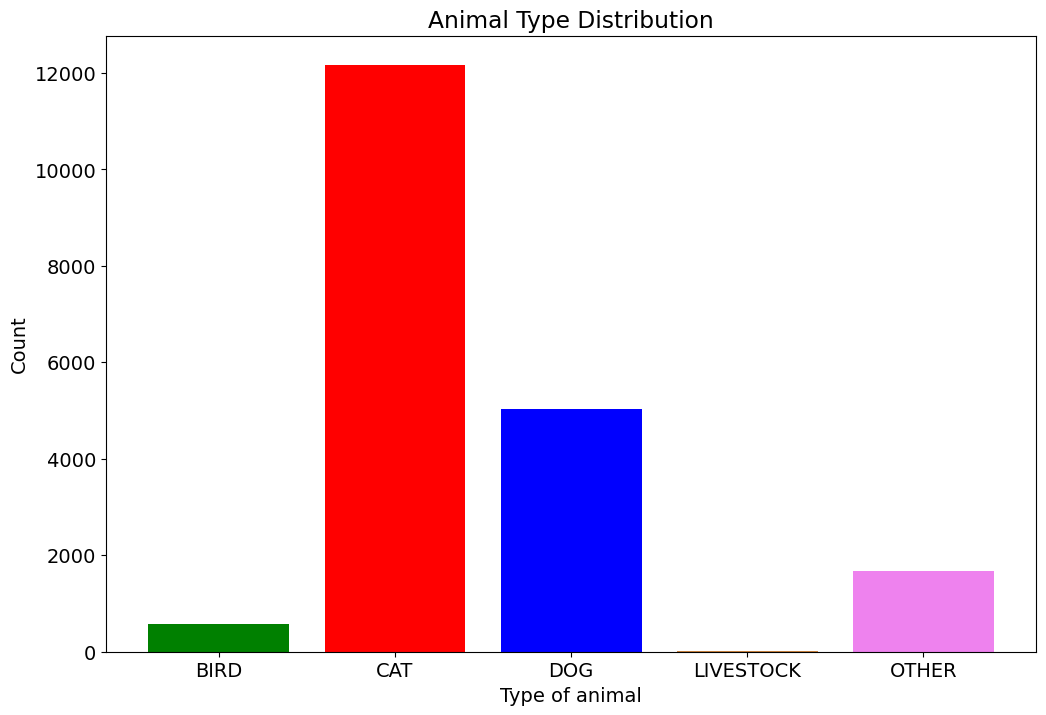

In [203]:
plt.title('Animal Type Distribution')
plt.ylabel('Count')
plt.xlabel('Type of animal')
plt.bar(data.groupby(['AnimalType']).groups.keys(),data.groupby(['AnimalType']).count()['_id'],color=['green','red','blue','peru','violet'])

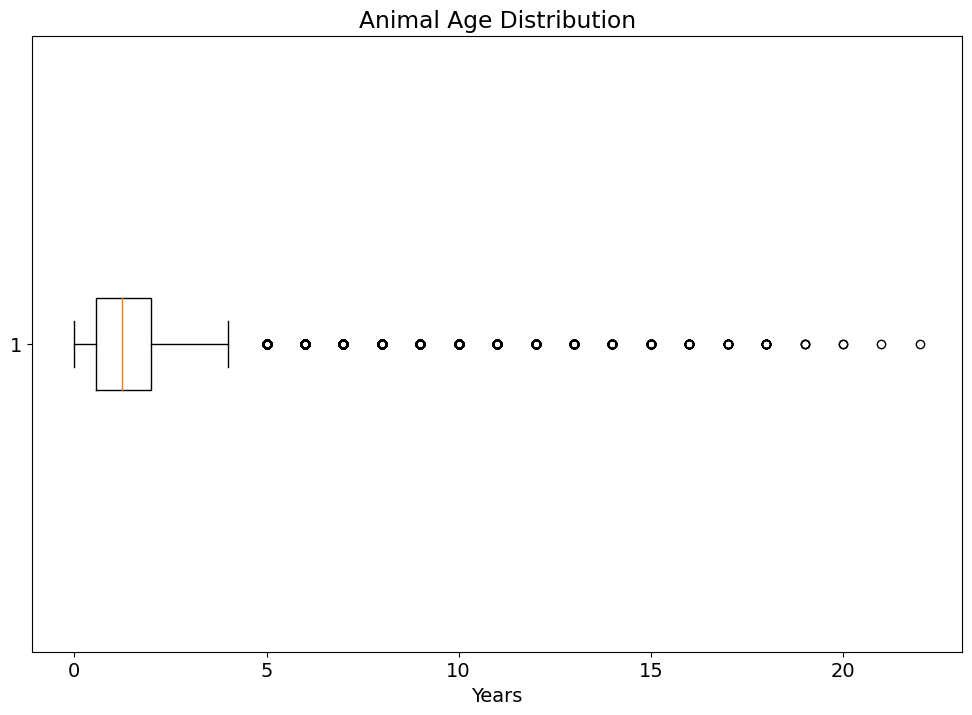

In [204]:
temp=data[~data['Age'].isna()]
plt.title('Animal Age Distribution')
plt.boxplot(temp['Age']/365,vert=False)
plt.xlabel('Years')
plt.show()

(array([9.556e+03, 1.303e+03, 5.440e+02, 2.620e+02, 2.640e+02, 2.470e+02,
        9.900e+01, 4.400e+01, 1.700e+01, 4.000e+00]),
 array([ 0. ,  2.2,  4.4,  6.6,  8.8, 11. , 13.2, 15.4, 17.6, 19.8, 22. ]),
 <BarContainer object of 10 artists>)

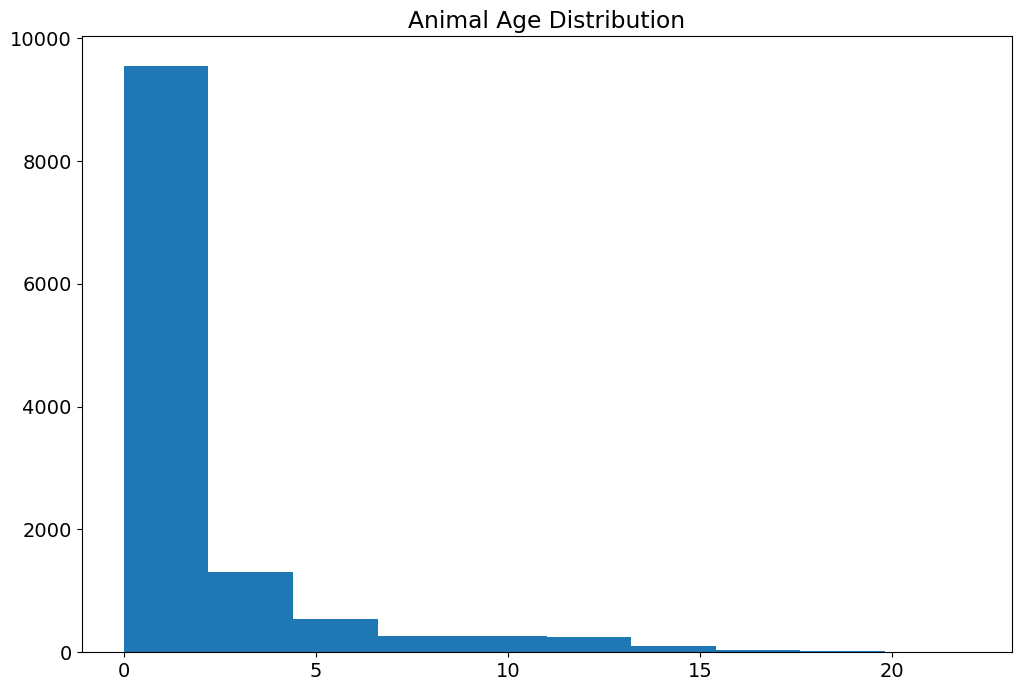

In [205]:
plt.title('Animal Age Distribution')
plt.hist(temp['Age']/365)

In [206]:
data.groupby(['OutcomeType']).groups.keys()

dict_keys(['ADOPTION', 'DIED', 'DISPOSAL', 'EUTH', 'FOSTER', 'FOUND ANIM', 'FOUND EXP', 'LOST EXP', 'MISSING', 'REQ EUTH', 'RESCUE', 'RTF', 'RTO', 'SPAY', 'TRANSFER'])

<BarContainer object of 5 artists>

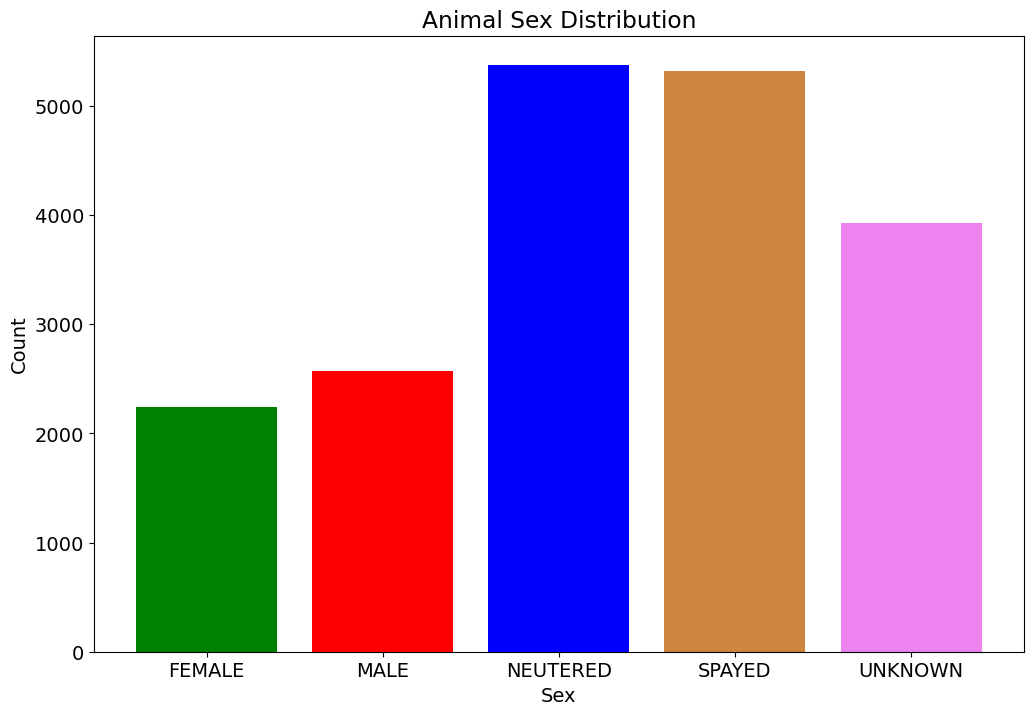

In [207]:
plt.title('Animal Sex Distribution')
plt.ylabel('Count')
plt.xlabel('Sex')
plt.bar(data.groupby(['Sex']).groups.keys(),data.groupby(['Sex']).count()['_id'],color=['green','red','blue','peru','violet'])

In [208]:
data.groupby(['OutcomeType']).groups.keys()

dict_keys(['ADOPTION', 'DIED', 'DISPOSAL', 'EUTH', 'FOSTER', 'FOUND ANIM', 'FOUND EXP', 'LOST EXP', 'MISSING', 'REQ EUTH', 'RESCUE', 'RTF', 'RTO', 'SPAY', 'TRANSFER'])

Text(0.5, 0, 'Outcome')

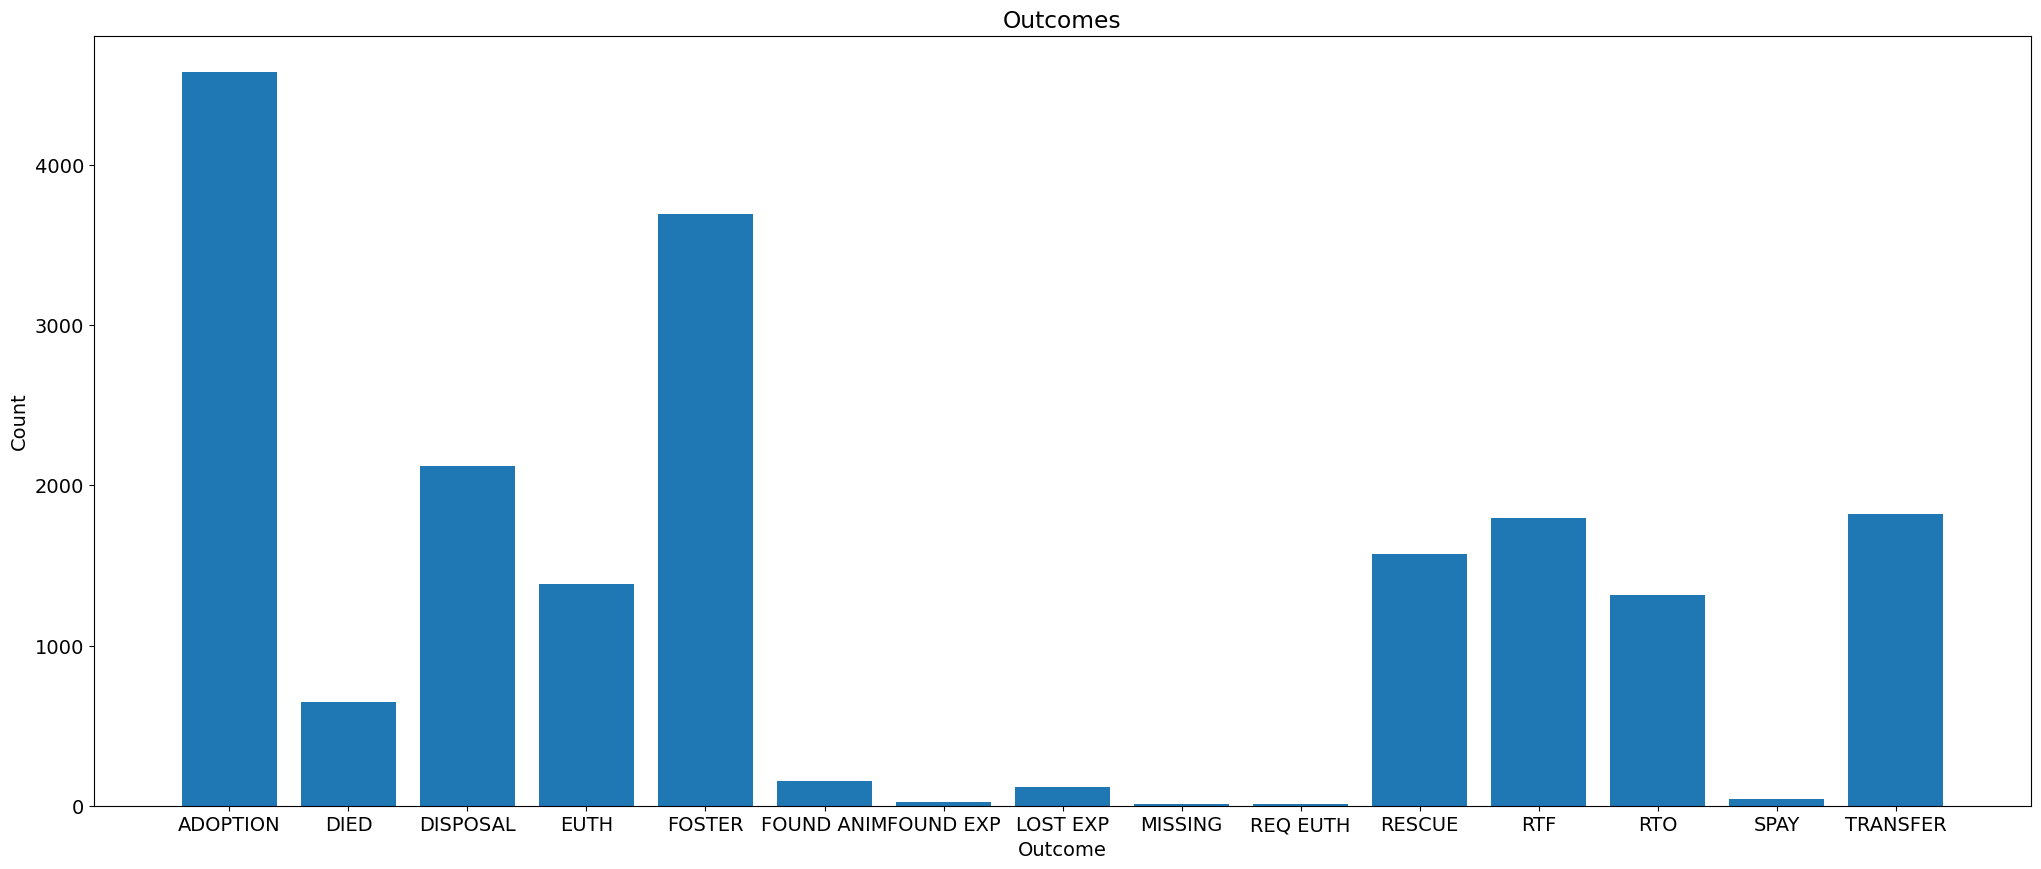

In [209]:
#RTF-return to field, RTO-return to owner
plt.figure(figsize=(25, 10))
plt.bar(data.groupby(['OutcomeType']).groups.keys(),data.groupby(['OutcomeType']).count()['_id'])#,color=['green','red','blue','peru','violet'])
plt.title('Outcomes')
plt.ylabel('Count')
plt.xlabel('Outcome')

In [210]:
data['OutcomeType'].unique()

array([nan, 'DISPOSAL', 'RESCUE', 'FOSTER', 'RTO', 'EUTH', 'ADOPTION',
       'TRANSFER', 'RTF', 'REQ EUTH', 'DIED', 'LOST EXP', 'FOUND ANIM',
       'FOUND EXP', 'SPAY', 'MISSING'], dtype=object)

In [211]:
data['OutcomeSubtype'].unique()

array([nan, 'MUTTVILLE', 'U MED SEV', 'WALK IN', 'COUNTY', 'MICROCHIP',
       'HSSV', 'LICENSE', 'BITTENKTN', 'U CANCER', 'TONISKITTY',
       'OTHER AGEN', 'TOWN CATS', 'NOTICE', 'ANDREASD', 'NEXT DOOR',
       'U MED EMRG', 'U AGG BIU', 'TAILSGRAY', 'WEBSITE', 'KITCAT',
       'SURRENDER', 'U FIV', 'AT VET', 'CALPAWS', 'KARMA CAT', 'MIRANDAS',
       'ROCKET DOG', 'HTL', 'U AGG DOG', 'R FRX LTP', 'IN KENNEL',
       'RABBITHVN', 'ENROUTE', 'EBSPCA', 'THULANI', 'RTO', 'COMPANIONA',
       'WAGNTRAILS', 'KEEP', 'ONE PLANET', 'ACEKITTY', 'NC ARF', 'FIELD',
       'M AGG FEAR', 'UMBRELLAHP', 'EPD', 'SVPP', 'PETSINNEED',
       'U AGG PREY', 'IN FOSTER', 'SC TLWG', 'PRIVATE', 'ROCHAUNICO',
       'PARTNERSNA', 'ADOPTBLK', 'ST FRANCIS', 'POST OP', 'CHESTERSC',
       'MINICAT', 'U PANLEUK', 'ARF', 'U NURSING', 'PAWS4SJACS',
       'SEQUOIA-HS', 'WILDLIFE', 'BASHUSKY', 'RADRODENT', 'U NURS SIC',
       'FRIEND', 'IN SURGERY', 'OUR PACK', '2NDCHNCCKR', 'REP PARTY',
       'HDBNQ', 'CATCREW'

Text(0.5, 0, 'DOB')

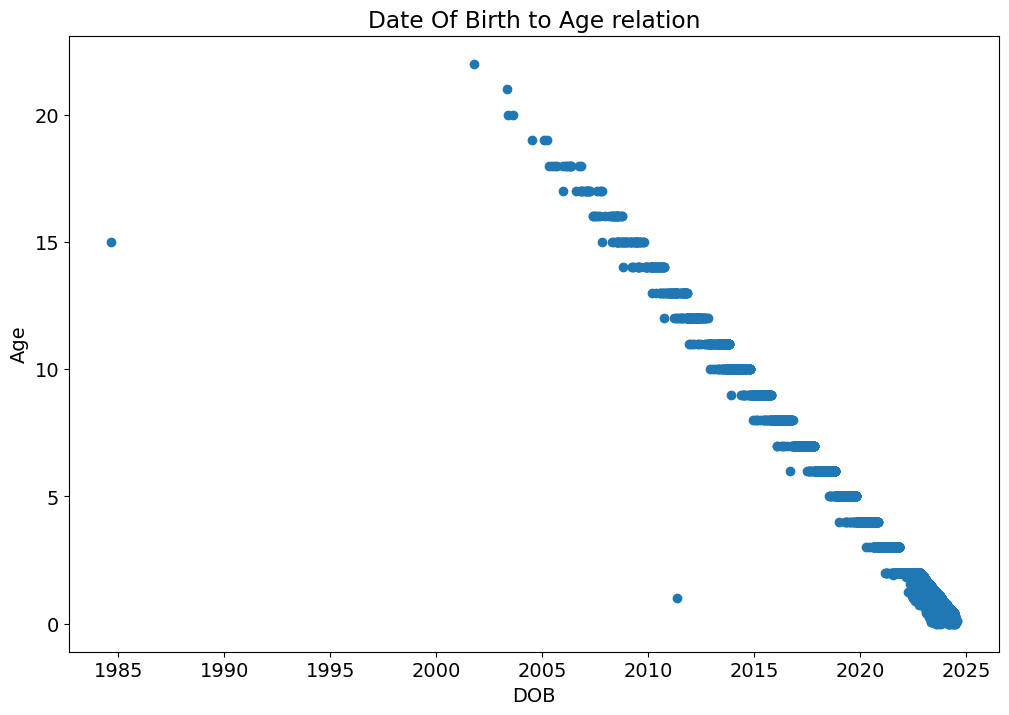

In [212]:
plt.scatter(data.DOB,data.Age/365)
plt.title('Date Of Birth to Age relation')
plt.ylabel('Age')
plt.xlabel('DOB')

In [213]:
data.sort_values(by=['DOB'])

,_id,AnimalType,PrimaryColor,SecondaryColor,PrimaryBreed,Sex,DOB,Age,IntakeDate,IntakeCondition,IntakeType,IntakeSubtype,OutcomeDate,OutcomeType,OutcomeSubtype,OutcomeCondition,Crossing,Jurisdiction
0,1,DOG,GOLD,GOLD,GOLDEN RETR,NEUTERED,1984-08-31,5475.0,2023-07-31,MED R,STRAY,OTC,2023-07-31,NaN,NaN,DEAD,OCALA AVENUE,NaN
7177,7178,CAT,BLACK,WHITE,DOMESTIC SH,FEMALE,2001-10-16,8030.0,2023-10-16,DEAD,DISPO REQ,OTC OWNED,2023-10-16,DISPOSAL,NaN,DEAD,NaN,SAN JOSE
16111,16112,DOG,WHITE,WHITE,POODLE MIN,FEMALE,2003-05-09,7665.0,2024-05-09,MED M,STRAY,OTC,2024-05-09,RTO,WEBSITE,MED M,BORINA RD/PINEWOOD,SAN JOSE
6,7,DOG,BLACK,BLACK,CHIHUAHUA SH,SPAYED,2003-05-23,7300.0,2023-12-26,DEAD,DISPO REQ,OTC OWNED,2023-12-26,DISPOSAL,NaN,DEAD,NaN,SAN JOSE
4074,4075,DOG,BLACK,WHITE,BORDER COLLIE,FEMALE,2003-08-16,7300.0,2023-08-16,DEAD,DISPO REQ,OTC OWNED,2023-08-16,DISPOSAL,NaN,DEAD,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19423,19424,CAT,ORANGE,WHITE,DOMESTIC SH,UNKNOWN,NaT,NaN,2024-06-30,NURSING,STRAY,OTC,2024-07-04,DIED,IN KENNEL,NURSING,MONTEREY RD X UMBARGER RD,SAN JOSE
19424,19425,CAT,ORANGE,WHITE,DOMESTIC SH,UNKNOWN,NaT,NaN,2024-06-30,NURSING,STRAY,OTC,2024-07-05,FOSTER,NaN,NURSING,MONTEREY RD X UMBARGER RD,SAN JOSE
19434,19435,DOG,BROWN,BROWN,POODLE MIN,FEMALE,NaT,NaN,2024-03-08,HEALTHY,STRAY,FIELD,2024-03-11,RTO,NaN,HEALTHY,COTTLE RD AT VILLAGE OAKS DR,SAN JOSE
19435,19436,CAT,TABBY-BRN,WHITE,DOMESTIC MH,NEUTERED,NaT,NaN,2024-04-16,MED M,STRAY,MEDVET,2024-04-19,RTF,NaN,FERAL,CAPITOL / PEARL,SAN JOSE


In [214]:
data=data.drop(columns=['DOB'])

In [215]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19441 entries, 0 to 19440
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   _id               19441 non-null  int64         
 1   AnimalType        19441 non-null  object        
 2   PrimaryColor      19441 non-null  object        
 3   SecondaryColor    19441 non-null  object        
 4   PrimaryBreed      19441 non-null  object        
 5   Sex               19441 non-null  object        
 6   Age               12340 non-null  float64       
 7   IntakeDate        19441 non-null  datetime64[ns]
 8   IntakeCondition   19441 non-null  object        
 9   IntakeType        19441 non-null  object        
 10  IntakeSubtype     15651 non-null  object        
 11  OutcomeDate       19277 non-null  datetime64[ns]
 12  OutcomeType       19276 non-null  object        
 13  OutcomeSubtype    8686 non-null   object        
 14  OutcomeCondition  1803

Text(0.5, 0, 'Condition')

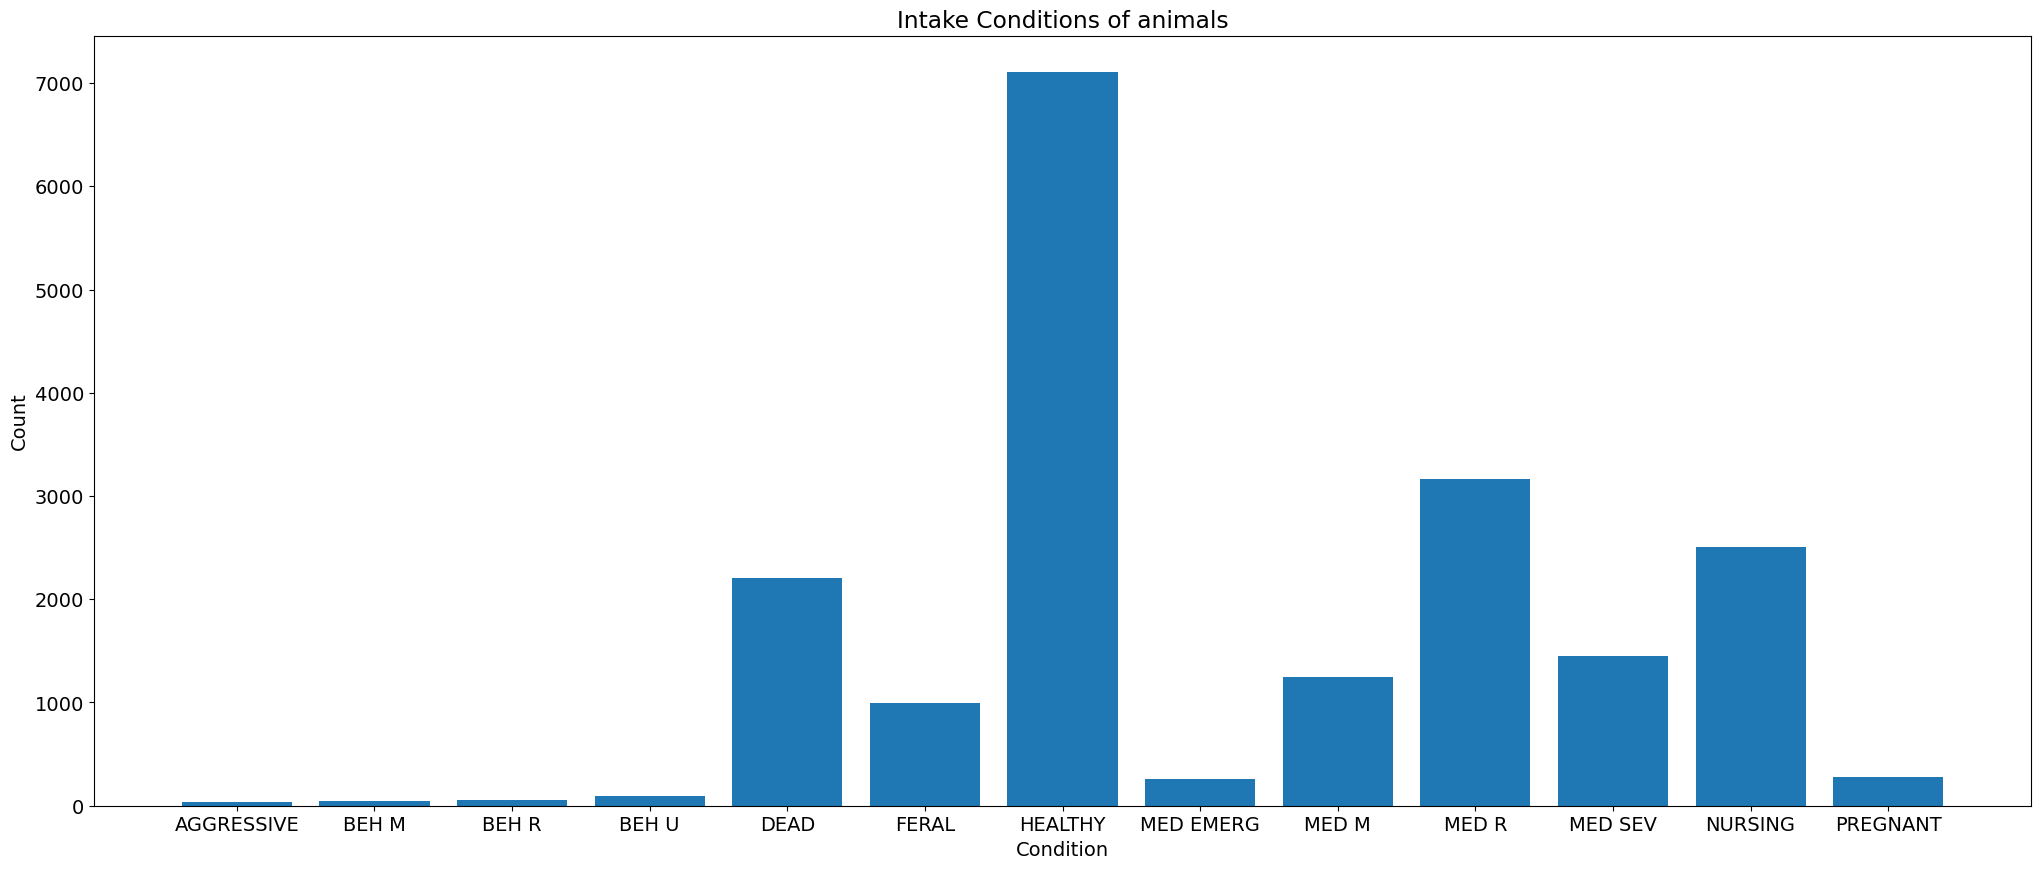

In [216]:
#RTF-return to field, RTO-return to owner

plt.figure(figsize=(25, 10))
plt.bar(data.groupby(['IntakeCondition']).groups.keys(),data.groupby(['IntakeCondition']).count()['_id'])
plt.title('Intake Conditions of animals')
plt.ylabel('Count')
plt.xlabel('Condition')

In [217]:
data = data[data.IntakeCondition != 'DEAD']

In [218]:
data.loc[data['OutcomeType'] == 'DISPOSAL']

,_id,AnimalType,PrimaryColor,SecondaryColor,PrimaryBreed,Sex,Age,IntakeDate,IntakeCondition,IntakeType,IntakeSubtype,OutcomeDate,OutcomeType,OutcomeSubtype,OutcomeCondition,Crossing,Jurisdiction
1774,1775,CAT,TABBY-ORG,TABBY-ORG,DOMESTIC SH,MALE,NaN,2023-07-06,MED EMERG,STRAY,FIELD,2023-07-08,DISPOSAL,NaN,DEAD,200 BLK RIO CHICO,SAN JOSE
1816,1817,CAT,TABBY-ORG,WHITE,DOMESTIC SH,UNKNOWN,NaN,2023-07-07,MED EMERG,STRAY,FIELD,2023-07-08,DISPOSAL,NaN,DEAD,SILVERCREEK X GREENYARD,SAN JOSE
2052,2053,BIRD,BROWN,BROWN,FINCH,UNKNOWN,NaN,2023-07-11,HEALTHY,WILDLIFE,OTC,2023-07-12,DISPOSAL,NaN,DEAD,VIRGINIA AVE,SAN JOSE
3330,3331,CAT,GRAY,GRAY,DOMESTIC SH,NEUTERED,1825.0,2023-08-02,MED SEV,STRAY,FIELD,2023-11-15,DISPOSAL,NaN,DEAD,PHANTOM X HAMILTON,SAN JOSE
3549,3550,CAT,BLACK,BLACK,DOMESTIC SH,UNKNOWN,NaN,2023-08-06,NURSING,STRAY,OTC,2023-11-15,DISPOSAL,NaN,DEAD,KING RD/MCKEE RD,SAN JOSE
3682,3683,CAT,TABBY-GRAY,TABBY-GRAY,DOMESTIC SH,MALE,120.0,2023-08-08,NURSING,STRAY,OTC,2023-11-15,DISPOSAL,NaN,DEAD,NEW WORLD DR,SAN JOSE
3849,3850,CAT,BLACK,WHITE,DOMESTIC SH,UNKNOWN,NaN,2023-08-12,MED SEV,STRAY,OTC,2023-11-15,DISPOSAL,NaN,DEAD,KNIGHTS BRIDGE RD/MESSINA DR,SAN JOSE
4065,4066,CAT,TORBI-DIL,TORBI-DIL,DOMESTIC SH,FEMALE,14.0,2023-08-16,NURSING,STRAY,OTC,2023-08-27,DISPOSAL,NaN,DEAD,JUPITER CT AND S GADSDEN DR,MILPITAS
4574,4575,CAT,TABBY-BRN,WHITE,DOMESTIC SH,FEMALE,91.0,2023-09-07,MED R,FOSTER,NaN,2023-11-15,DISPOSAL,NaN,DEAD,NaN,SAN JOSE
4575,4576,CAT,TABBY-BRN,TABBY-BRN,DOMESTIC SH,FEMALE,91.0,2023-09-07,MED R,FOSTER,NaN,2023-11-15,DISPOSAL,NaN,DEAD,NaN,SAN JOSE


In [219]:
data.loc[data['OutcomeType'] == 'DISPOSAL'] = 'DEAD'

In [220]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17236 entries, 0 to 19440
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   _id               17236 non-null  object
 1   AnimalType        17236 non-null  object
 2   PrimaryColor      17236 non-null  object
 3   SecondaryColor    17236 non-null  object
 4   PrimaryBreed      17236 non-null  object
 5   Sex               17236 non-null  object
 6   Age               12126 non-null  object
 7   IntakeDate        17236 non-null  object
 8   IntakeCondition   17236 non-null  object
 9   IntakeType        17236 non-null  object
 10  IntakeSubtype     13529 non-null  object
 11  OutcomeDate       17115 non-null  object
 12  OutcomeType       17110 non-null  object
 13  OutcomeSubtype    8663 non-null   object
 14  OutcomeCondition  15873 non-null  object
 15  Crossing          12803 non-null  object
 16  Jurisdiction      16691 non-null  object
dtypes: object(17)
mem

Text(0.5, 0, 'Condition')

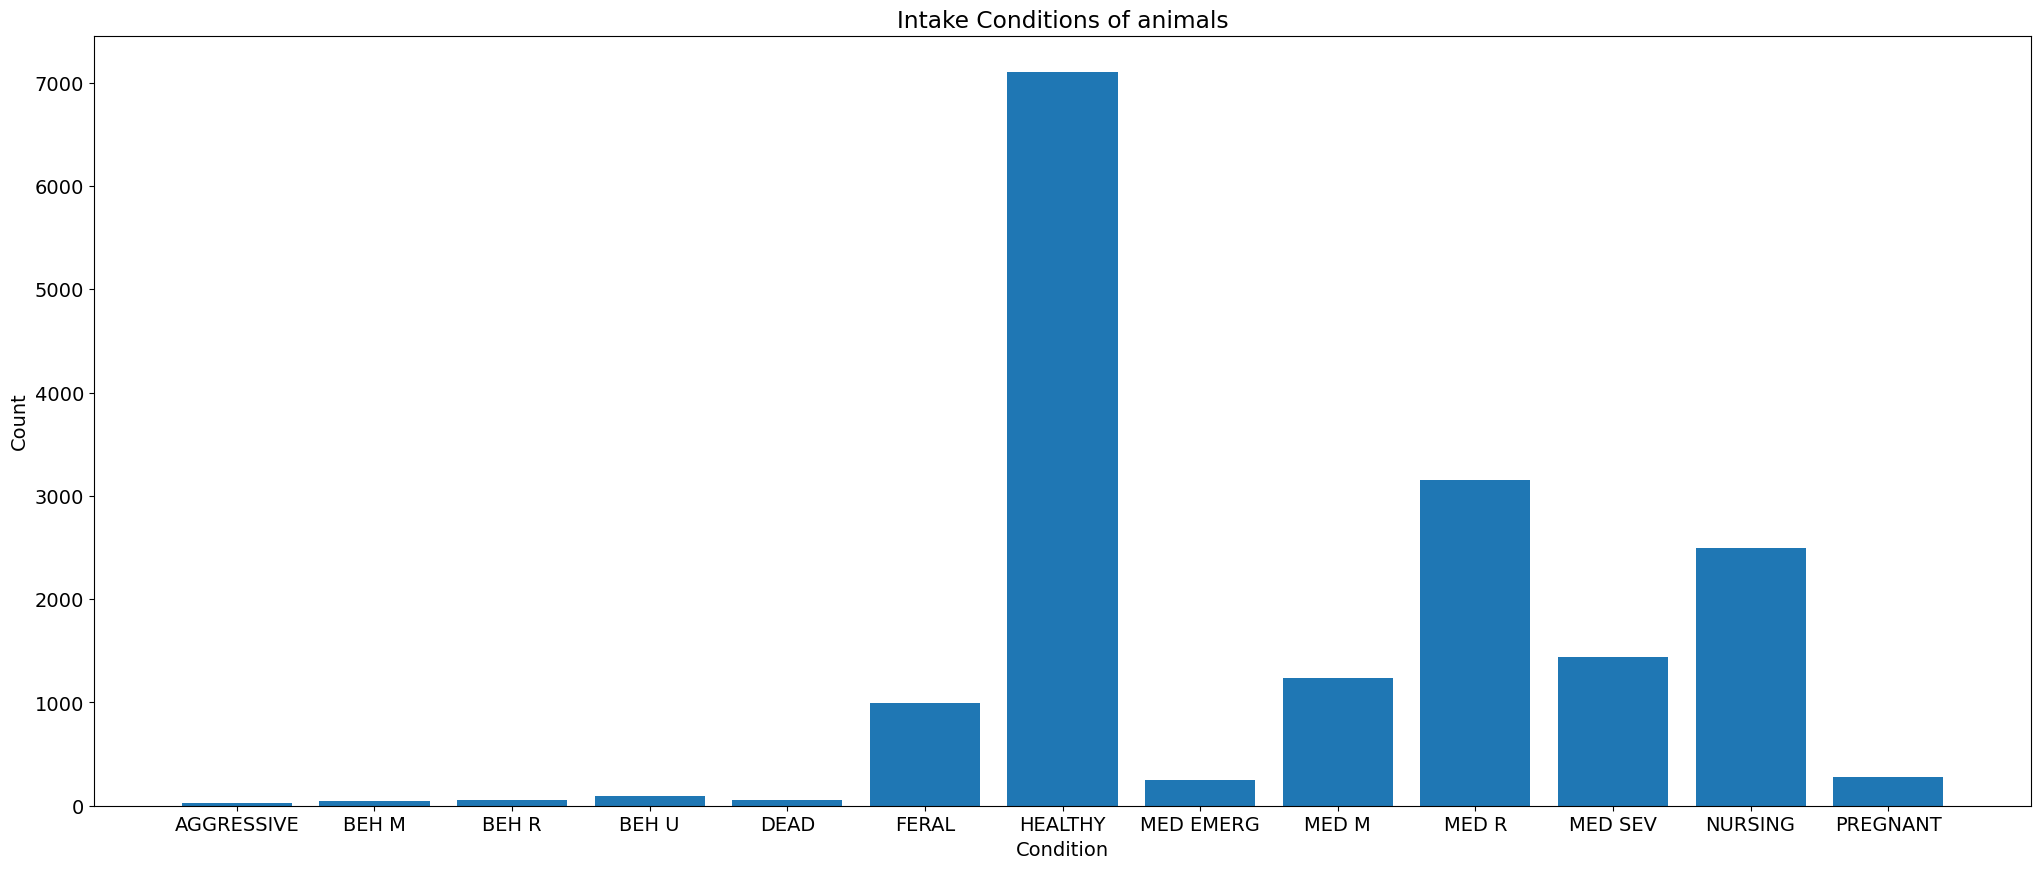

In [221]:
plt.figure(figsize=(25, 10))
plt.bar(data.groupby(['IntakeCondition']).groups.keys(),data.groupby(['IntakeCondition']).count()['_id'])
plt.title('Intake Conditions of animals')
plt.ylabel('Count')
plt.xlabel('Condition')

Text(0.5, 0, 'Outcome')

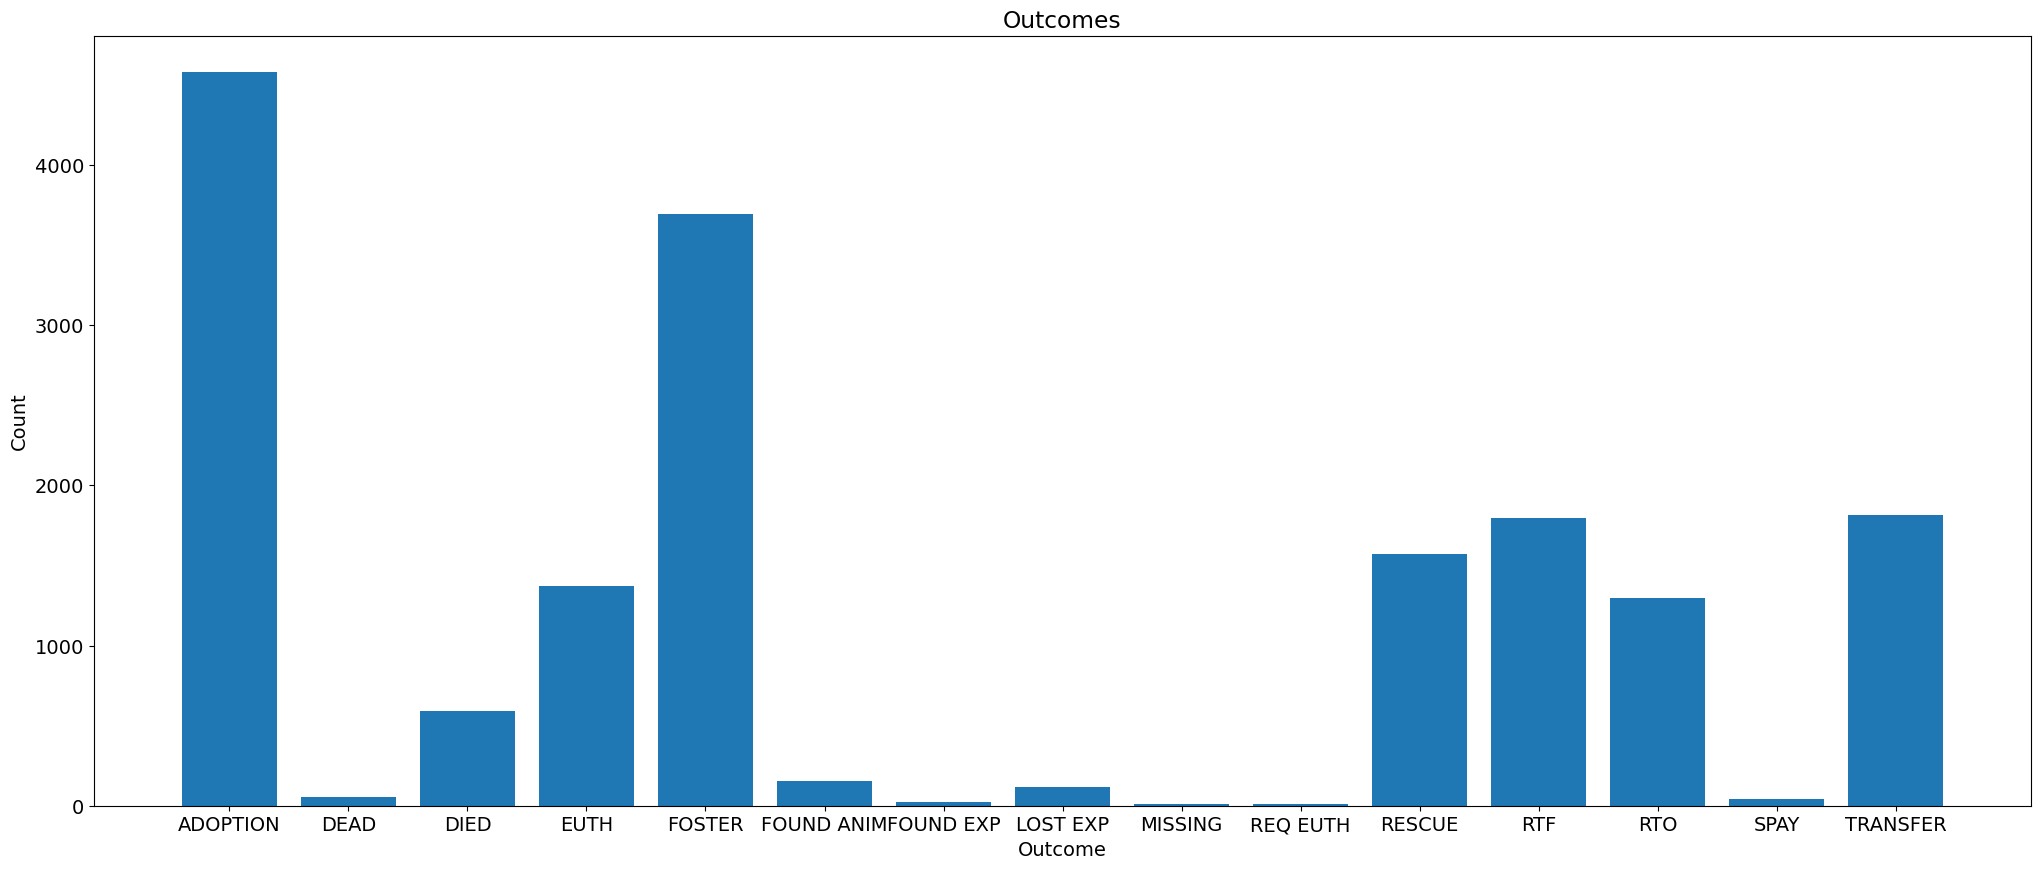

In [222]:
#RTF-return to field, RTO-return to owner
plt.figure(figsize=(25, 10))
plt.bar(data.groupby(['OutcomeType']).groups.keys(),data.groupby(['OutcomeType']).count()['_id'])#,color=['green','red','blue','peru','violet'])
plt.title('Outcomes')
plt.ylabel('Count')
plt.xlabel('Outcome')

In [223]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17236 entries, 0 to 19440
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   _id               17236 non-null  object
 1   AnimalType        17236 non-null  object
 2   PrimaryColor      17236 non-null  object
 3   SecondaryColor    17236 non-null  object
 4   PrimaryBreed      17236 non-null  object
 5   Sex               17236 non-null  object
 6   Age               12126 non-null  object
 7   IntakeDate        17236 non-null  object
 8   IntakeCondition   17236 non-null  object
 9   IntakeType        17236 non-null  object
 10  IntakeSubtype     13529 non-null  object
 11  OutcomeDate       17115 non-null  object
 12  OutcomeType       17110 non-null  object
 13  OutcomeSubtype    8663 non-null   object
 14  OutcomeCondition  15873 non-null  object
 15  Crossing          12803 non-null  object
 16  Jurisdiction      16691 non-null  object
dtypes: object(17)
mem

Text(0.5, 0, 'Intake Type')

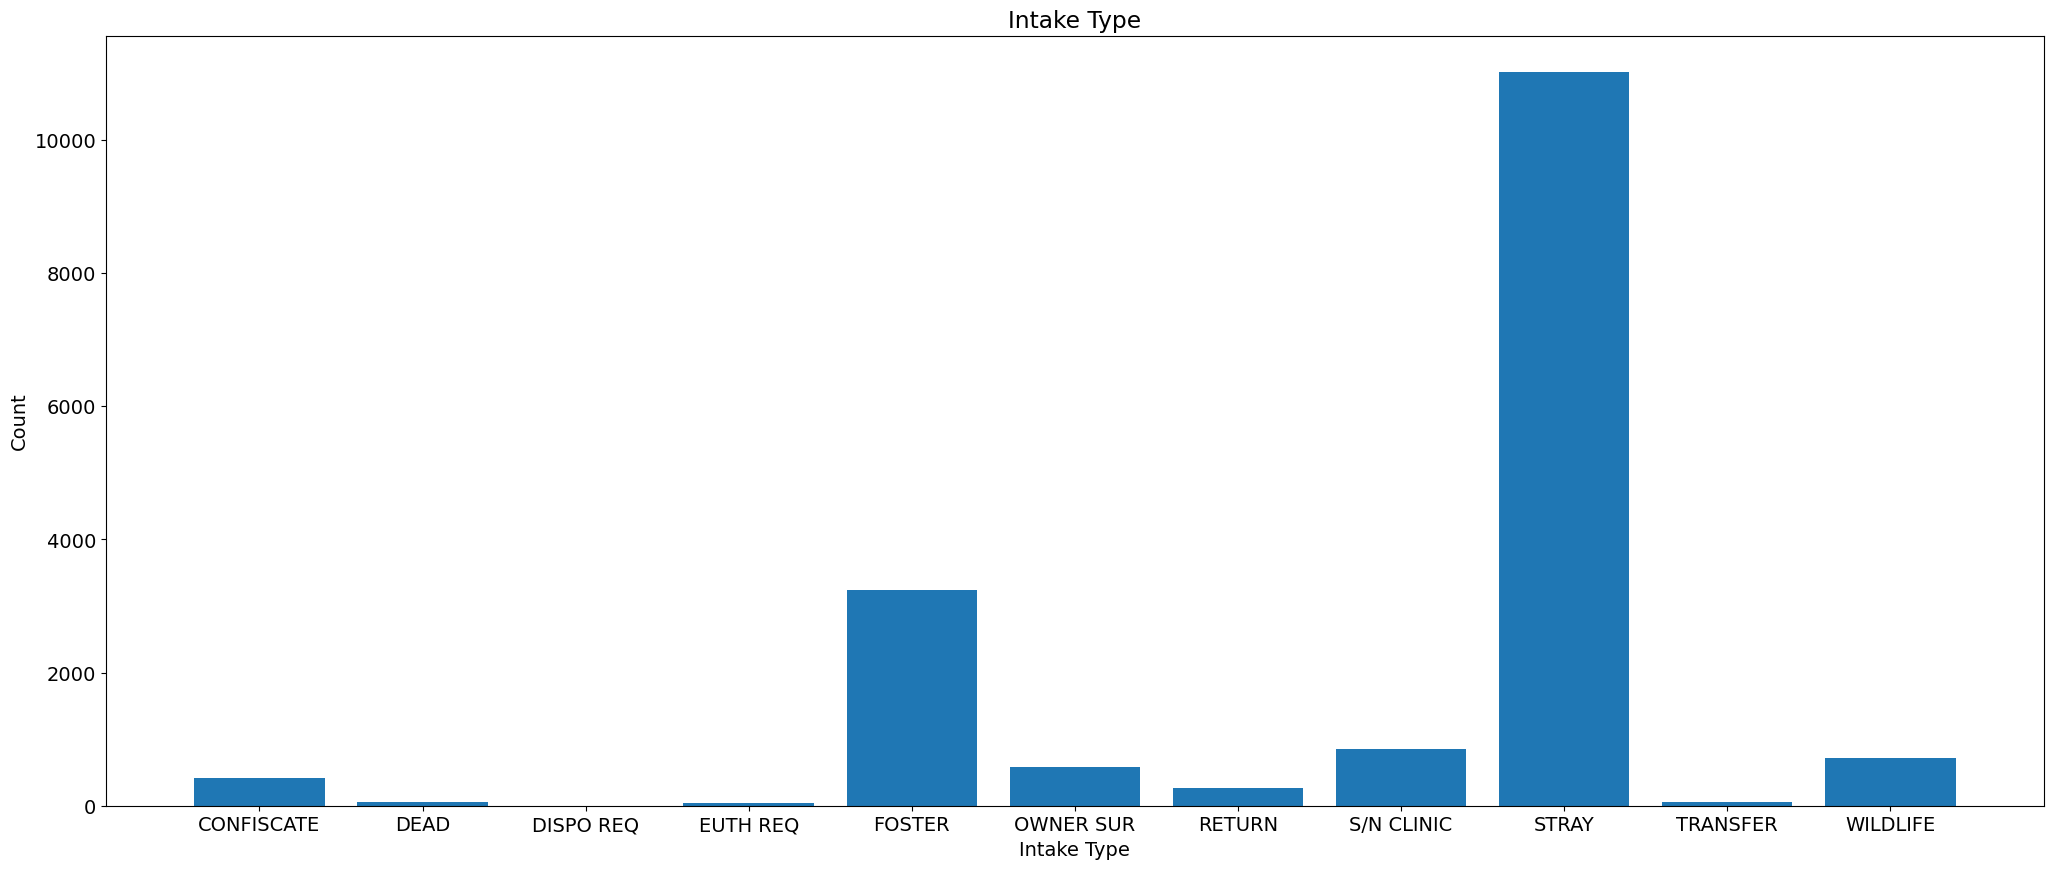

In [224]:
#RTF-return to field, RTO-return to owner
plt.figure(figsize=(25, 10))
plt.bar(data.groupby(['IntakeType']).groups.keys(),data.groupby(['IntakeType']).count()['_id'])#,color=['green','red','blue','peru','violet'])
plt.title('Intake Type')
plt.ylabel('Count')
plt.xlabel('Intake Type')

In [225]:
data = data[data.IntakeType != 'DEAD']

In [226]:
data = data[data.IntakeType != 'DISPO REQ']

In [227]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17181 entries, 0 to 19440
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   _id               17181 non-null  object
 1   AnimalType        17181 non-null  object
 2   PrimaryColor      17181 non-null  object
 3   SecondaryColor    17181 non-null  object
 4   PrimaryBreed      17181 non-null  object
 5   Sex               17181 non-null  object
 6   Age               12073 non-null  object
 7   IntakeDate        17181 non-null  object
 8   IntakeCondition   17181 non-null  object
 9   IntakeType        17181 non-null  object
 10  IntakeSubtype     13474 non-null  object
 11  OutcomeDate       17060 non-null  object
 12  OutcomeType       17055 non-null  object
 13  OutcomeSubtype    8608 non-null   object
 14  OutcomeCondition  15818 non-null  object
 15  Crossing          12748 non-null  object
 16  Jurisdiction      16636 non-null  object
dtypes: object(17)
mem

In [228]:
data['OutcomeType'].unique()

array([nan, 'RESCUE', 'FOSTER', 'RTO', 'EUTH', 'ADOPTION', 'TRANSFER',
       'RTF', 'REQ EUTH', 'DIED', 'LOST EXP', 'FOUND ANIM', 'FOUND EXP',
       'SPAY', 'MISSING'], dtype=object)

In [229]:
data['OutcomeSubtype'].unique()

array([nan, 'MUTTVILLE', 'U MED SEV', 'WALK IN', 'COUNTY', 'MICROCHIP',
       'HSSV', 'LICENSE', 'BITTENKTN', 'U CANCER', 'TONISKITTY',
       'OTHER AGEN', 'TOWN CATS', 'NOTICE', 'ANDREASD', 'NEXT DOOR',
       'U MED EMRG', 'U AGG BIU', 'TAILSGRAY', 'WEBSITE', 'KITCAT',
       'SURRENDER', 'U FIV', 'AT VET', 'CALPAWS', 'KARMA CAT', 'MIRANDAS',
       'ROCKET DOG', 'U AGG DOG', 'R FRX LTP', 'IN KENNEL', 'RABBITHVN',
       'ENROUTE', 'EBSPCA', 'THULANI', 'RTO', 'COMPANIONA', 'WAGNTRAILS',
       'KEEP', 'ONE PLANET', 'ACEKITTY', 'NC ARF', 'FIELD', 'M AGG FEAR',
       'UMBRELLAHP', 'EPD', 'SVPP', 'PETSINNEED', 'U AGG PREY', 'SC TLWG',
       'PRIVATE', 'ROCHAUNICO', 'PARTNERSNA', 'ADOPTBLK', 'ST FRANCIS',
       'POST OP', 'CHESTERSC', 'MINICAT', 'U PANLEUK', 'IN FOSTER', 'ARF',
       'PAWS4SJACS', 'SEQUOIA-HS', 'WILDLIFE', 'BASHUSKY', 'RADRODENT',
       'U NURS SIC', 'FRIEND', 'IN SURGERY', 'OUR PACK', '2NDCHNCCKR',
       'REP PARTY', 'HDBNQ', 'CATCREW', 'GEPDA', 'TPPUG', 'GATOSD

In [231]:
data['OutcomeCondition'].unique()

array(['DEAD', 'MED R', 'HEALTHY', 'MED SEV', nan, 'MED M', 'MED EMERG',
       'BEH U', 'FERAL', 'AGGRESSIVE', 'BEH R', 'BEH M', 'NURSING',
       'PREGNANT'], dtype=object)

In [236]:
data.groupby(['OutcomeType','OutcomeSubtype','OutcomeCondition']).groups.keys()

dict_keys([('ADOPTION', 'FRIEND', 'HEALTHY'), ('ADOPTION', 'WALK IN', 'BEH M'), ('ADOPTION', 'WALK IN', 'BEH R'), ('ADOPTION', 'WALK IN', 'BEH U'), ('ADOPTION', 'WALK IN', 'FERAL'), ('ADOPTION', 'WALK IN', 'HEALTHY'), ('ADOPTION', 'WALK IN', 'MED M'), ('ADOPTION', 'WALK IN', 'MED R'), ('ADOPTION', 'WALK IN', 'MED SEV'), ('ADOPTION', 'WALK IN', 'NURSING'), ('ADOPTION', 'WALK IN', nan), ('ADOPTION', 'WEBSITE', 'BEH R'), ('ADOPTION', 'WEBSITE', 'HEALTHY'), ('ADOPTION', 'WEBSITE', 'MED M'), ('ADOPTION', 'WEBSITE', 'MED R'), ('ADOPTION', 'WEBSITE', nan), ('ADOPTION', nan, 'BEH M'), ('ADOPTION', nan, 'BEH R'), ('ADOPTION', nan, 'BEH U'), ('ADOPTION', nan, 'HEALTHY'), ('ADOPTION', nan, 'MED EMERG'), ('ADOPTION', nan, 'MED M'), ('ADOPTION', nan, 'MED R'), ('ADOPTION', nan, 'MED SEV'), ('ADOPTION', nan, 'NURSING'), ('ADOPTION', nan, nan), ('DIED', 'AT VET', 'DEAD'), ('DIED', 'AT VET', 'MED EMERG'), ('DIED', 'AT VET', 'MED SEV'), ('DIED', 'AT VET', 'NURSING'), ('DIED', 'AT VET', nan), ('DIED', '

In [178]:
data.OutcomeSubtype.fillna(data.OutcomeType, inplace=True)

In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17181 entries, 0 to 19440
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   _id               17181 non-null  object
 1   AnimalType        17181 non-null  object
 2   PrimaryColor      17181 non-null  object
 3   SecondaryColor    17181 non-null  object
 4   PrimaryBreed      17181 non-null  object
 5   Sex               17181 non-null  object
 6   Age               12073 non-null  object
 7   IntakeDate        17181 non-null  object
 8   IntakeCondition   17181 non-null  object
 9   IntakeType        17181 non-null  object
 10  IntakeSubtype     13474 non-null  object
 11  OutcomeDate       17060 non-null  object
 12  OutcomeType       17055 non-null  object
 13  OutcomeSubtype    17060 non-null  object
 14  OutcomeCondition  15818 non-null  object
 15  Crossing          12748 non-null  object
 16  Jurisdiction      16636 non-null  object
dtypes: object(17)
mem

Text(0.5, 0, 'Outcome')

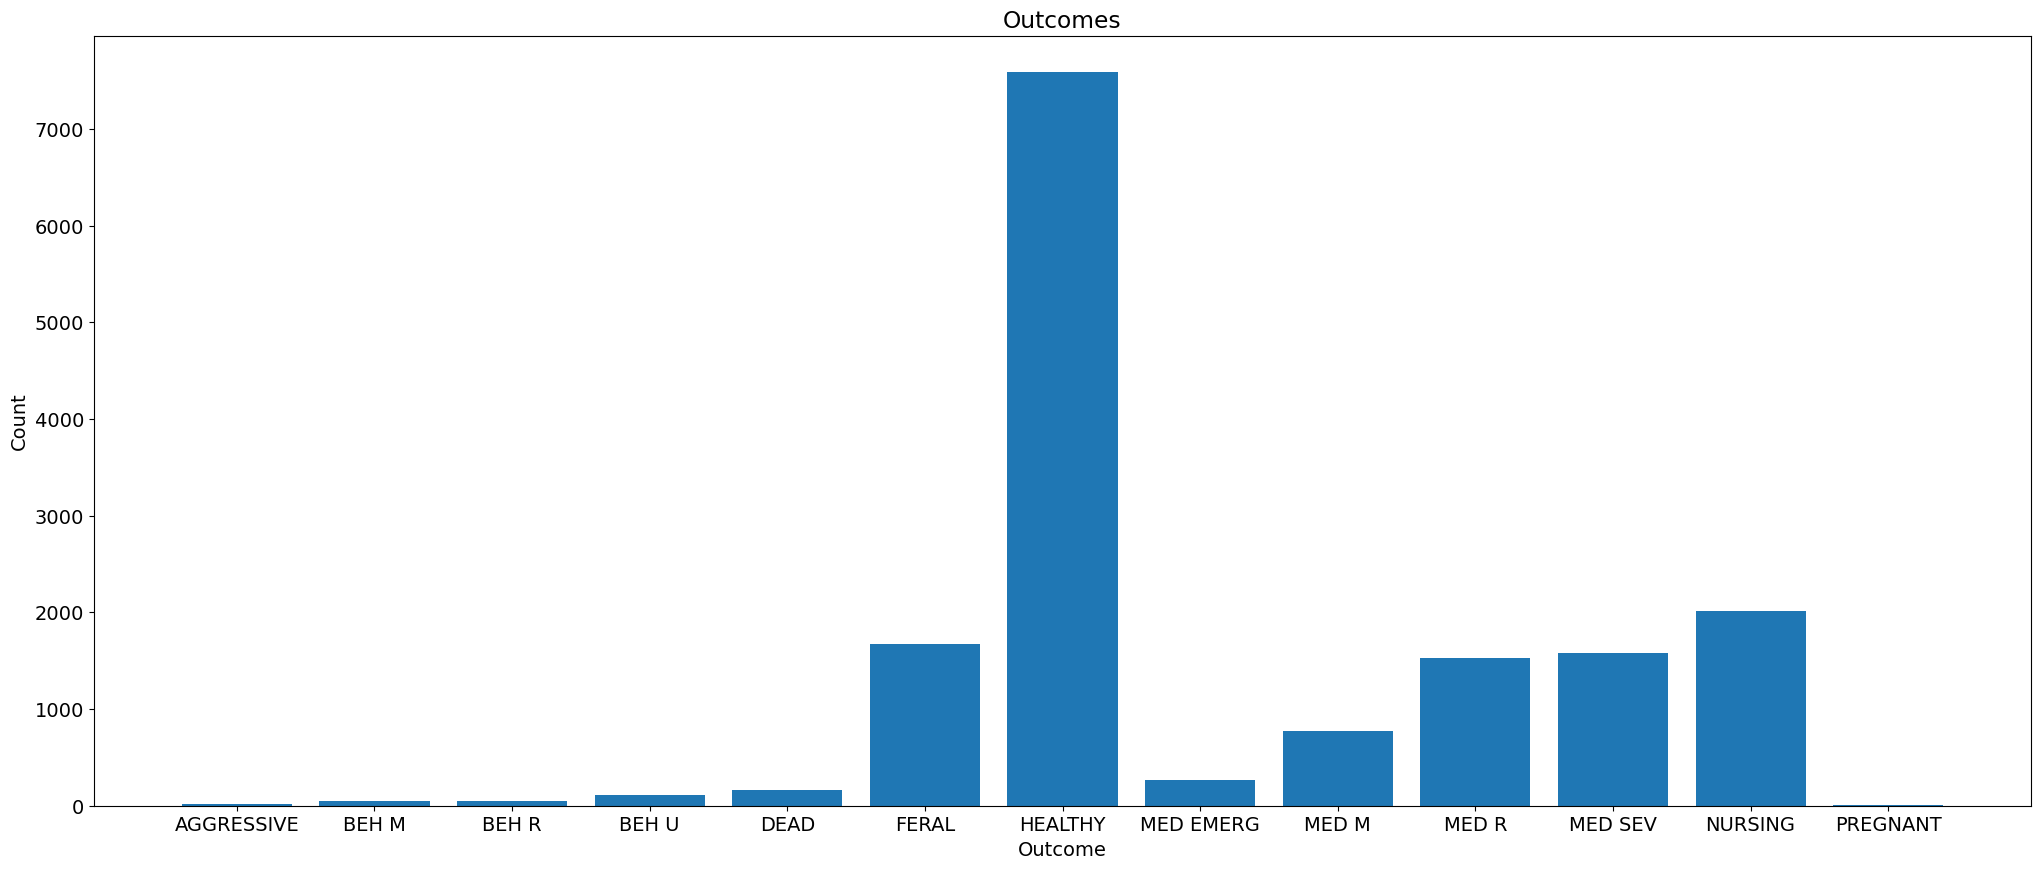

In [180]:
#RTF-return to field, RTO-return to owner
plt.figure(figsize=(25, 10))
plt.bar(data.groupby(['OutcomeCondition']).groups.keys(),data.groupby(['OutcomeCondition']).count()['_id'])#,color=['green','red','blue','peru','violet'])
plt.title('Outcomes')
plt.ylabel('Count')
plt.xlabel('Outcome')

In [181]:
data.head()

,_id,AnimalType,PrimaryColor,SecondaryColor,PrimaryBreed,Sex,Age,IntakeDate,IntakeCondition,IntakeType,IntakeSubtype,OutcomeDate,OutcomeType,OutcomeSubtype,OutcomeCondition,Crossing,Jurisdiction
0,1,DOG,GOLD,GOLD,GOLDEN RETR,NEUTERED,5475.0,2023-07-31 00:00:00,MED R,STRAY,OTC,2023-07-31 00:00:00,NaN,NaN,DEAD,OCALA AVENUE,NaN
4,5,DOG,TAN,WHITE,CHIHUAHUA SH,NEUTERED,6570.0,2024-02-26 00:00:00,MED R,FOSTER,NaN,2024-02-27 00:00:00,RESCUE,MUTTVILLE,MED R,NaN,SAN JOSE
5,6,DOG,TAN,WHITE,CHIHUAHUA SH,NEUTERED,6570.0,2023-08-28 00:00:00,MED R,OWNER SUR,OTC,2024-02-26 00:00:00,FOSTER,FOSTER,MED R,NaN,SAN JOSE
10,11,CAT,GRAY,GRAY,DOMESTIC SH,SPAYED,5840.0,2024-06-16 00:00:00,MED R,STRAY,MEDVET,2024-06-19 00:00:00,RTO,RTO,HEALTHY,ALMADEN EX / MCABEE,SAN JOSE
13,14,DOG,RED,SABLE,SHIBA INU,SPAYED,6205.0,2023-07-01 00:00:00,MED R,STRAY,MEDVET,2023-07-05 00:00:00,RTO,RTO,MED R,BLOSSOM HILL RD. CHICK FIL A,SAN JOSE


Text(0.5, 0, 'Outcome')

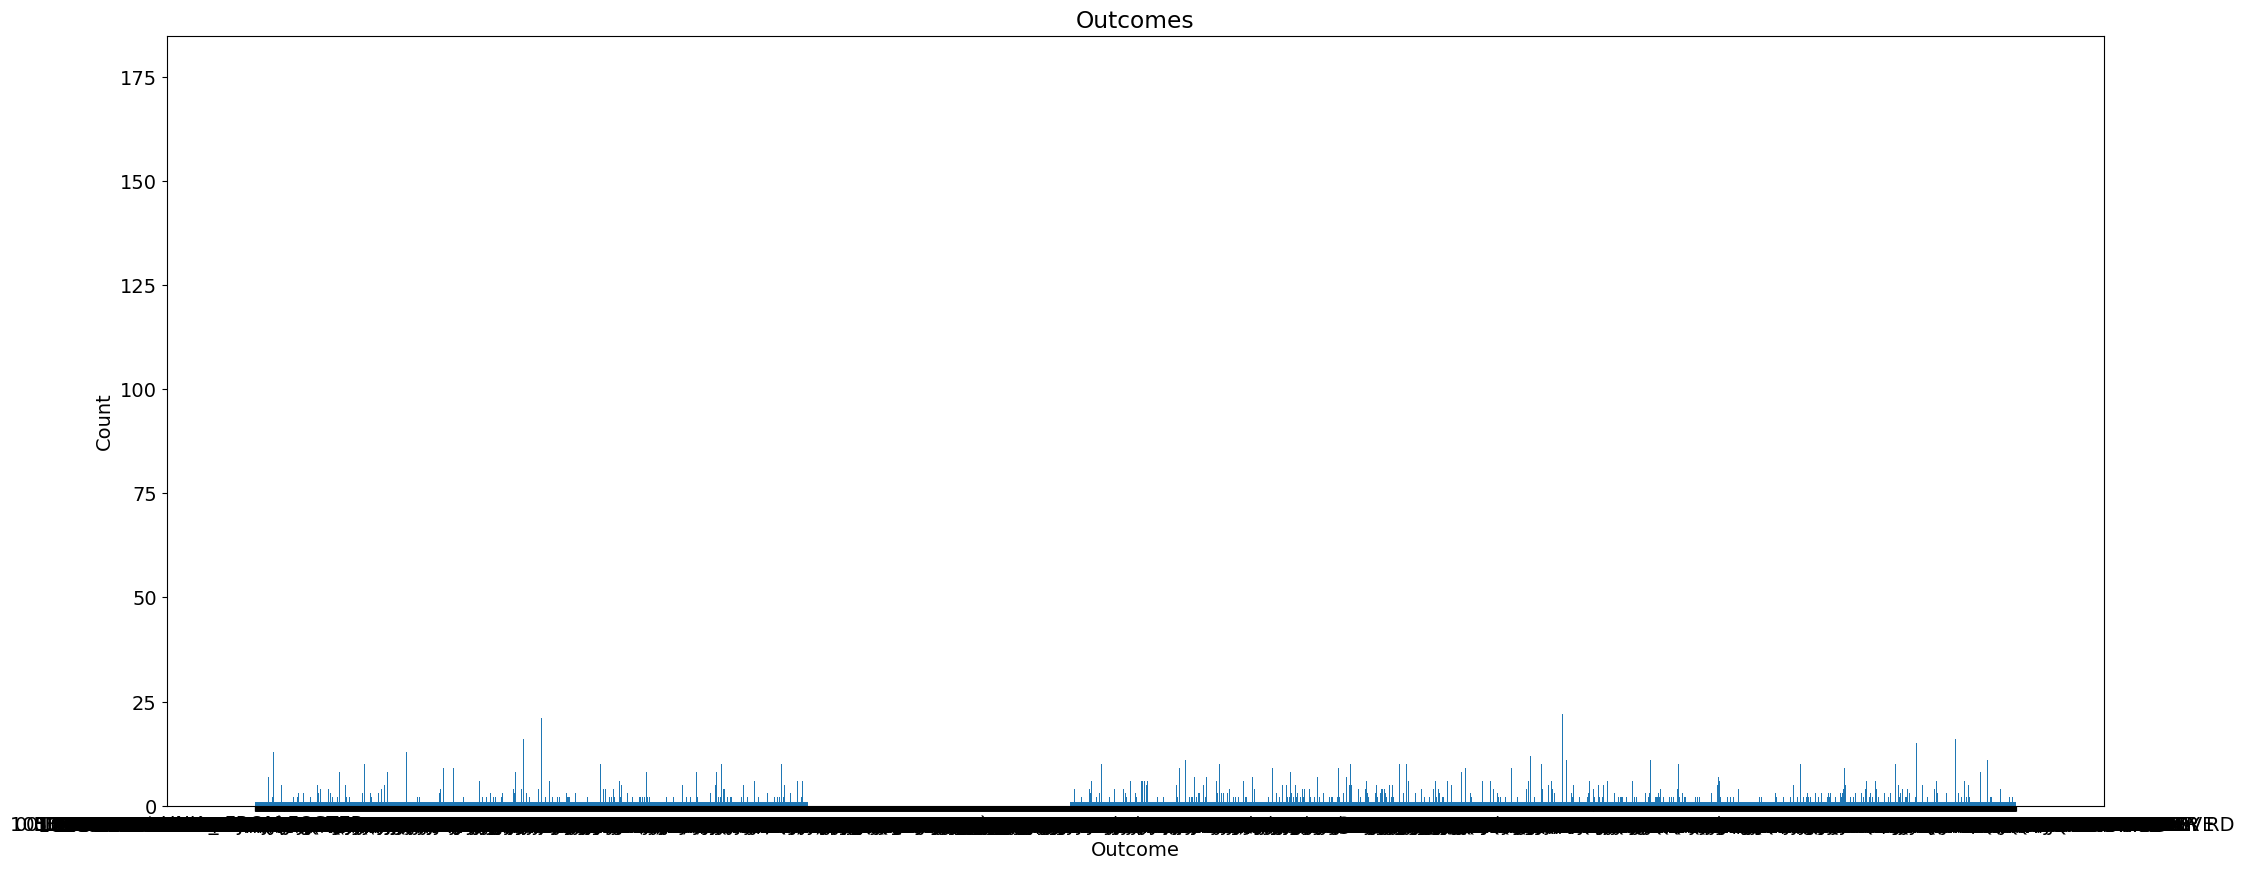

In [182]:
#RTF-return to field, RTO-return to owner
plt.figure(figsize=(25, 10))
plt.bar(data.groupby(['Crossing']).groups.keys(),data.groupby(['Crossing']).count()['_id'])#,color=['green','red','blue','peru','violet'])
plt.title('Outcomes')
plt.ylabel('Count')
plt.xlabel('Outcome')

Text(0.5, 0, 'Outcome')

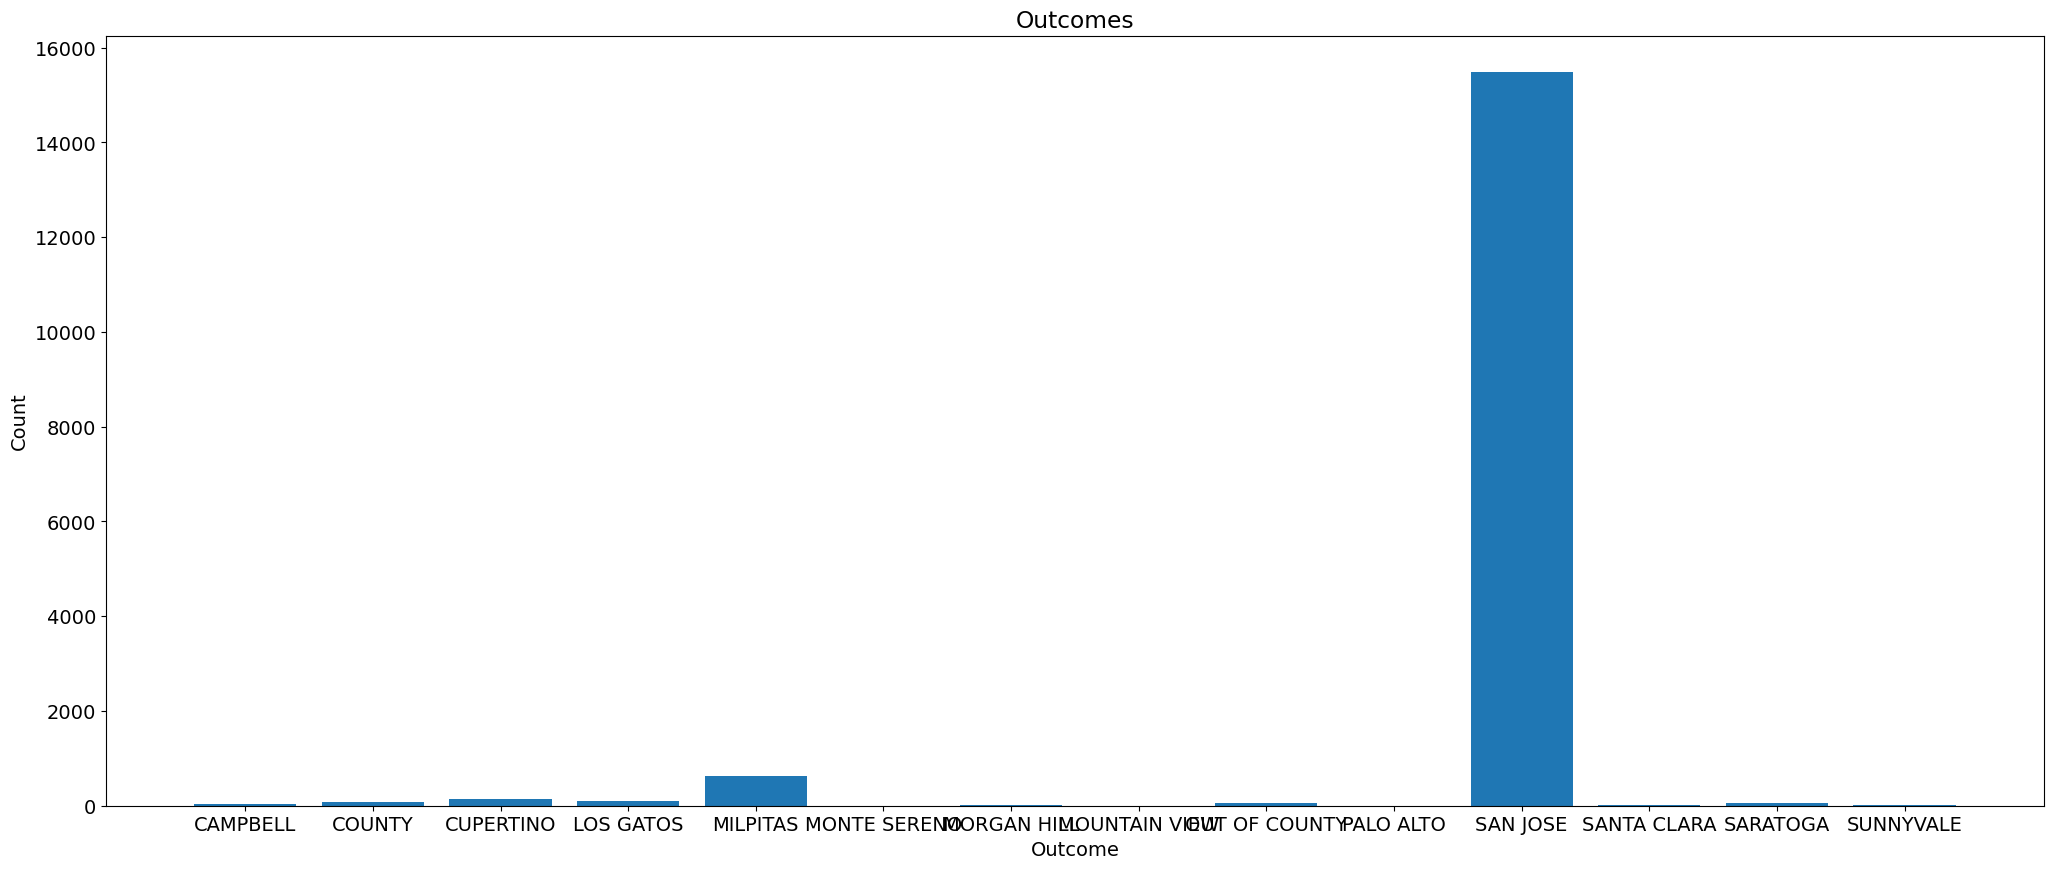

In [183]:
#RTF-return to field, RTO-return to owner
plt.figure(figsize=(25, 10))
plt.bar(data.groupby(['Jurisdiction']).groups.keys(),data.groupby(['Jurisdiction']).count()['_id'])#,color=['green','red','blue','peru','violet'])
plt.title('Outcomes')
plt.ylabel('Count')
plt.xlabel('Outcome')